## Correlation analysis between rubric difficulty and TARr/TARa

Does question difficulty impact determinism of raw output and/or answer? 

## Measuring difficutly

We can get a measure of difficulty by identifying rubrics that our assembled LLMs struggle with by analyzing accuracy. A simple approach is to sum the performance across configurations and look for low scoring rubrics--those are the hard ones. Then we ask how the TARr/TARa correlate with rubric score across all models/configurations. 

## Data

The script `rubric_difficulty.py` evaluates for each task x rubric, which we will just call the rubric, the average performance of all the configurations, model, model configuration and task configuraiton, on the task. Run it as:

```
python rubric_difficulty.py -d ../v2/release_data/few_shot -eo
...
[1657 rows x 11 columns]
Open difficulty_eval.csv in your favorite spreadsheet for results
```

Below the output is read in and displayed

In [55]:
import pandas as pd

difficulty_df = pd.read_csv('difficulty_eval.csv')
display(difficulty_df[['task', 'rubric_id', 'TARr', 'TARa', 'accuracy']])


,task,rubric_id,TARr,TARa,accuracy
0,navigate,0,0.8,1.0,1.00
1,navigate,1,0.8,1.0,1.00
2,navigate,2,1.0,1.0,1.00
3,navigate,3,0.8,1.0,0.80
4,navigate,4,0.6,1.0,1.00
...,...,...,...,...,...
1652,ruin_names,245,0.2,0.8,0.68
1653,ruin_names,246,0.4,0.8,0.40
1654,ruin_names,247,0.2,1.0,0.60
1655,ruin_names,248,0.4,0.6,0.60


In [52]:
df = difficulty_df[(difficulty_df['task'] == 'college_mathematics')]

display(df)

,Unnamed: 0,task,rubric_id,TACr,TARr,TACa,TARa,total_configs,config_counts,total,correct,accuracy
282,282,college_mathematics,0,1,0.333333,0,0.000000,3,"{'mixtral-8x7b:{""temperature"": 0.0, ""seed"": 12...",15,3,0.200000
283,283,college_mathematics,1,1,0.333333,2,0.666667,3,"{'mixtral-8x7b:{""temperature"": 0.0, ""seed"": 12...",15,0,0.000000
284,284,college_mathematics,2,1,0.333333,2,0.666667,3,"{'mixtral-8x7b:{""temperature"": 0.0, ""seed"": 12...",15,0,0.000000
285,285,college_mathematics,3,1,0.333333,1,0.333333,3,"{'mixtral-8x7b:{""temperature"": 0.0, ""seed"": 12...",15,5,0.333333
286,286,college_mathematics,4,1,0.333333,3,1.000000,3,"{'mixtral-8x7b:{""temperature"": 0.0, ""seed"": 12...",15,15,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,college_mathematics,95,1,0.333333,2,0.666667,3,"{'mixtral-8x7b:{""temperature"": 0.0, ""seed"": 12...",15,13,0.866667
378,378,college_mathematics,96,1,0.333333,1,0.333333,3,"{'mixtral-8x7b:{""temperature"": 0.0, ""seed"": 12...",15,1,0.066667
379,379,college_mathematics,97,1,0.333333,1,0.333333,3,"{'mixtral-8x7b:{""temperature"": 0.0, ""seed"": 12...",15,2,0.133333
380,380,college_mathematics,98,1,0.333333,1,0.333333,3,"{'mixtral-8x7b:{""temperature"": 0.0, ""seed"": 12...",15,0,0.000000


## Correlating `TARr` to `accuracy`

<IPython.core.display.Javascript object>

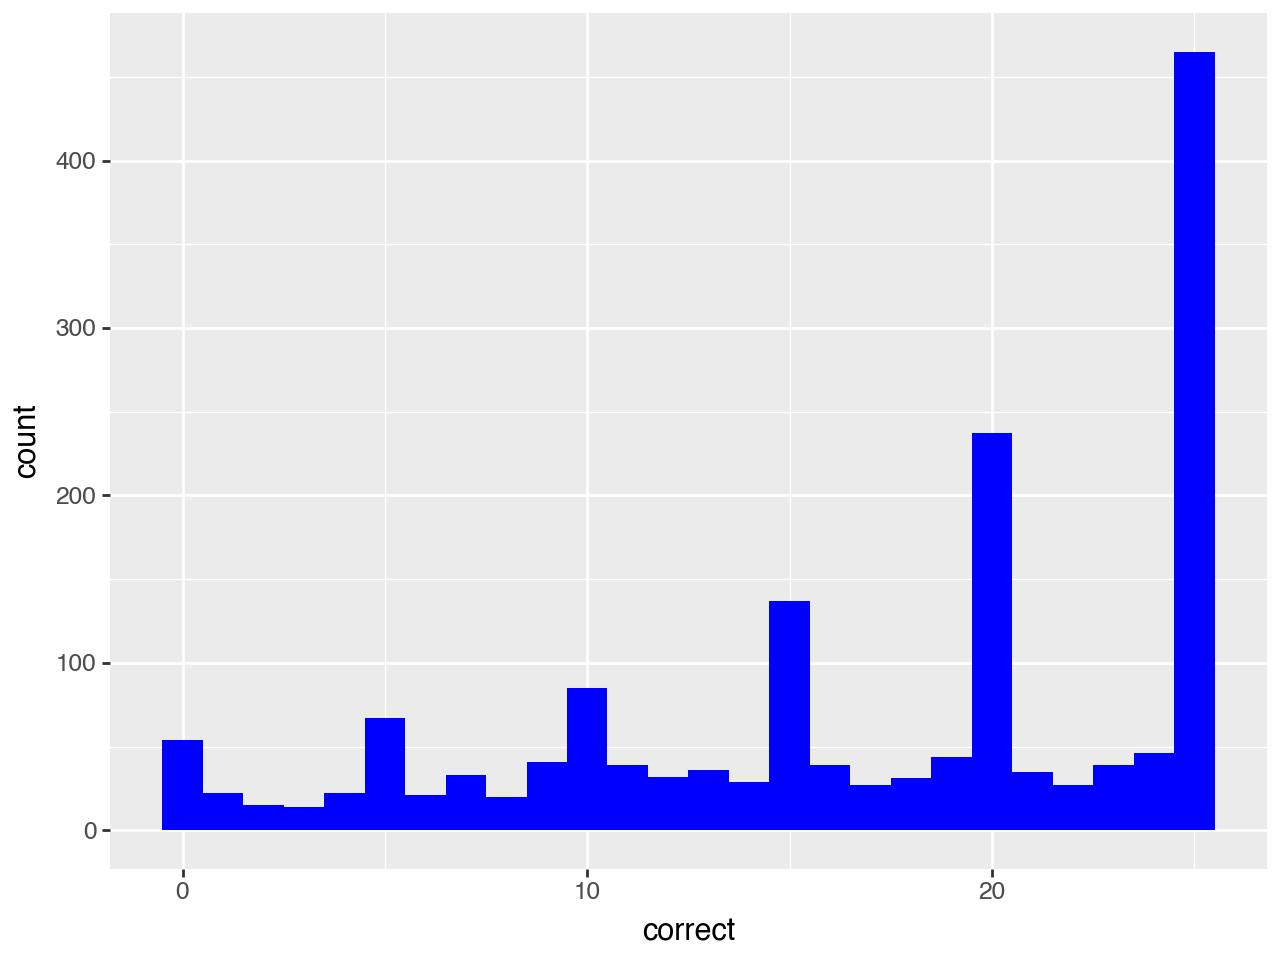

In [100]:
%matplotlib notebook

import plotnine as p9

#df = difficulty_df[difficulty_df['task'] == 'college_mathematics']
df = difficulty_df

#display(df)
plot = ( p9.ggplot(df)
        + p9.geom_histogram(p9.aes(x='correct'), binwidth=1, fill='blue')

)

plot



The correct counts are the total # correct/ #runs, the clear accumulations every value divisable by 5 has to be from configs tending to get all answers wrong or right. We know that answers are more stable than raw so this is not a suprise. 

Does rubric difficulty correlate with complete answer clusters?
Do harder rubrics have lower complete raw clusters?



On a per config basis how does the relationship between difficulty and TARr go?



In [ ]:
%matplotlib inline

import json

config_df = pd.read_csv('difficulty_eval.csv')
for col in config_df.columns:
    if col.startswith('raw'):
        plot = ( p9.ggplot(data=config_df)
        #+ p9.geom_jitter(mapping=p9.aes(x=col, y='accuracy'), width=.001))
        + p9.geom_dotplot(mapping=p9.aes(x=col, y='accuracy'), binwidth=.01, dotsize=.01,
                          stackdir="up", stackratio=1.1))
        display(plot)
    

#display(difficulty_df[['task', 'rubric_id', 'accuracy']])


In [ ]:
%matplotlib inline

import json

config_df = pd.read_csv('difficulty_eval.csv')
for col in config_df.columns:
    if col.startswith('answer'):
        plot = ( p9.ggplot(data=config_df)
        + p9.geom_jitter(mapping=p9.aes(x=col, y='accuracy'), width=.001))
        display(plot)
    

## Computing correlation

Pearsons is the standard measure but it assumes normally distributed data which the accuracy for the models is not, see 20 run experiments, but how that works for the micro accuracy above needs some thinking.

We want to know if difficult questions are less stable. It seems difficult to estimate difficulty other than by the LLMs accuracy.

We could descretize difficlty to see if that kicks up some signal:

- How stable are rubrics where all models fail on all outputs? See if the extreme value yields apparent corrleation

We could soften TARr/a to be 4/5, 3/5, e.g., max(equivalent ouputs) which would allow 2/5 and 1/5 metrics. 



 The above graphs explore TARr and TARa which is either 0 or 1 for any given (rubric x configuration). Maybe we need to 

Below code tests whether length of response correlates with max raw count (the maximum number of exact matching responses for rubric, if it matches the number of runs N then it counts as part of TACr@N).

max raw count: gpt-4o:{"temperature": 0.0, "seed": 12, "top_p_k": 1.0}:{"prompt_type": "v2", "shots": "few"}


<IPython.core.display.Javascript object>

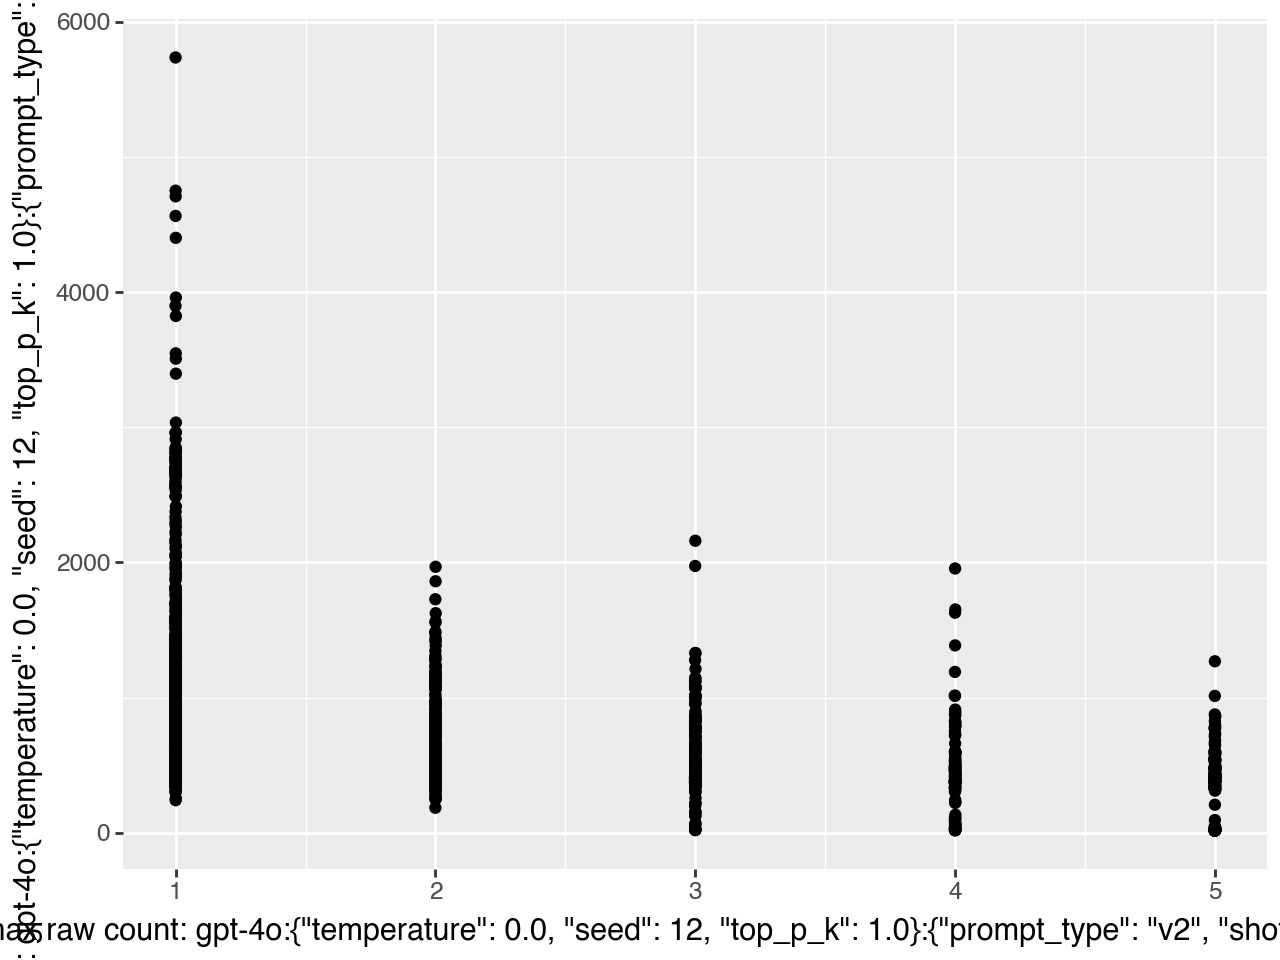

max raw count: mixtral-8x7b:{"temperature": 0.0, "seed": 12, "top_p_k": 1.0}:{"prompt_type": "v2", "shots": "few"}


<IPython.core.display.Javascript object>

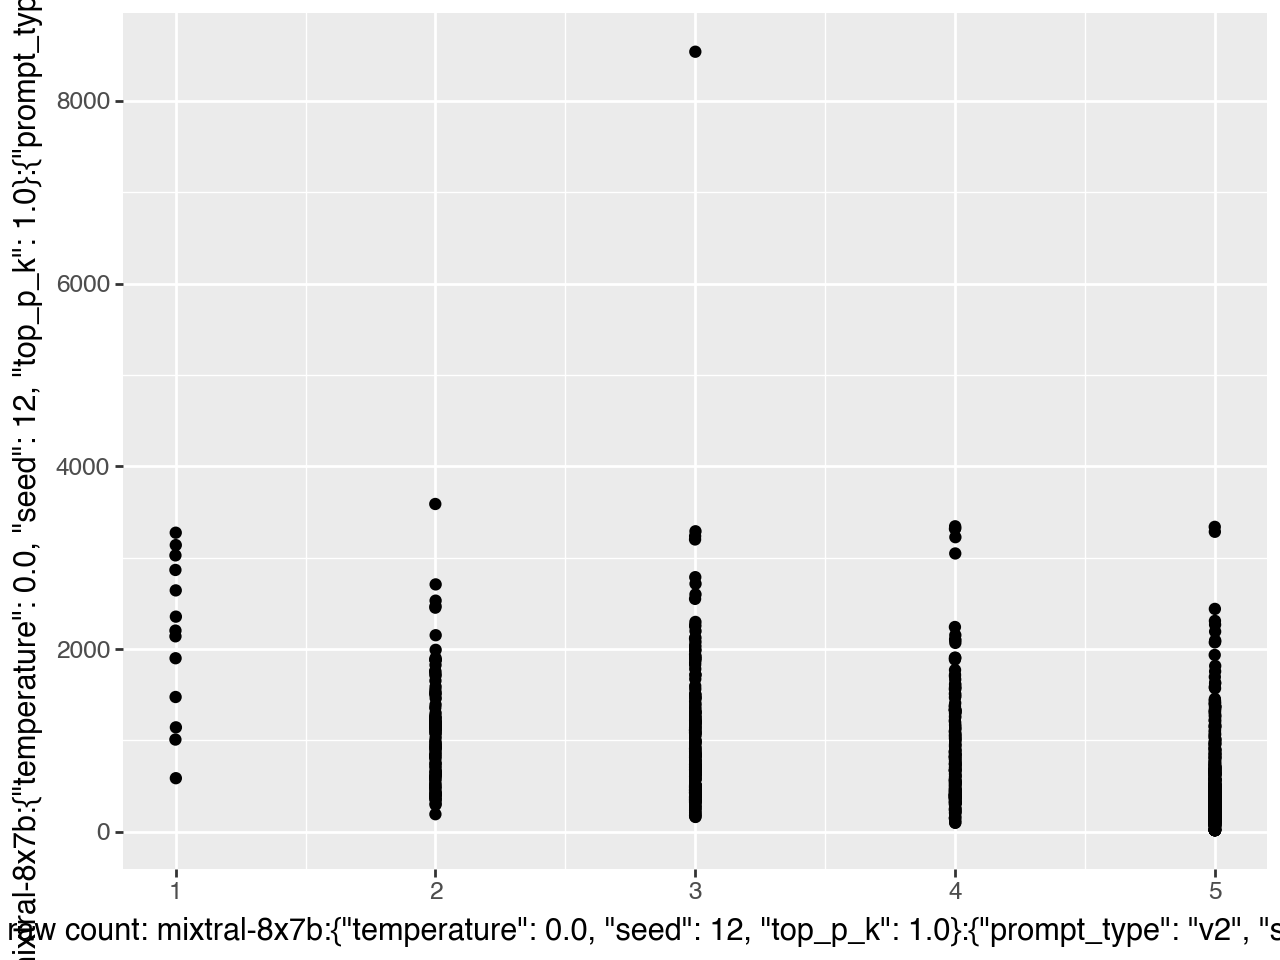

max raw count: gpt-35-turbo:{"temperature": 0.0, "seed": 12, "top_p_k": 1.0}:{"prompt_type": "v2", "shots": "few"}


<IPython.core.display.Javascript object>

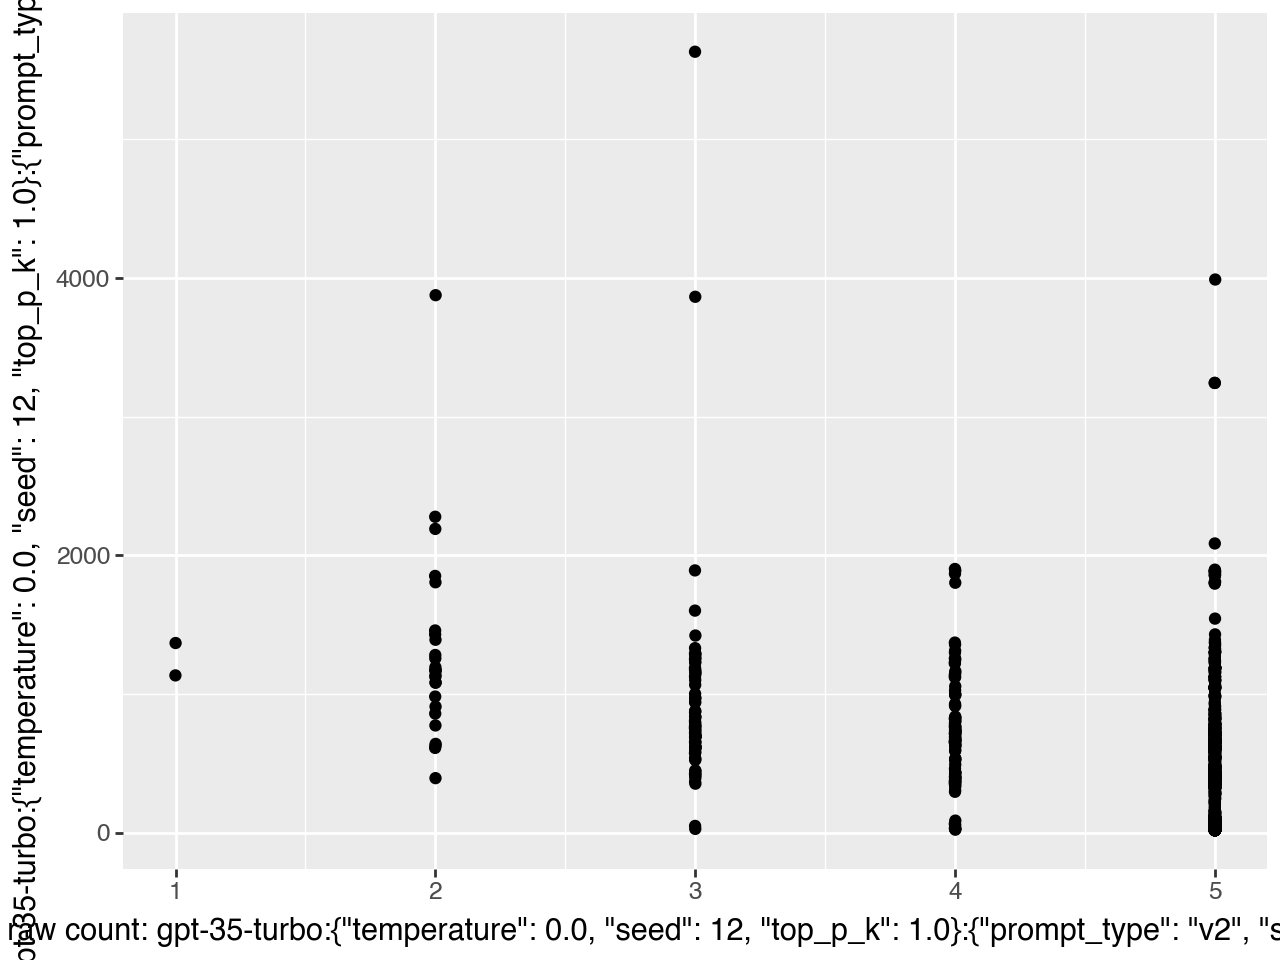

max raw count: llama-3-8b:{"temperature": 0.0, "seed": 12, "top_p_k": 1.0}:{"prompt_type": "v2", "shots": "few"}


<IPython.core.display.Javascript object>

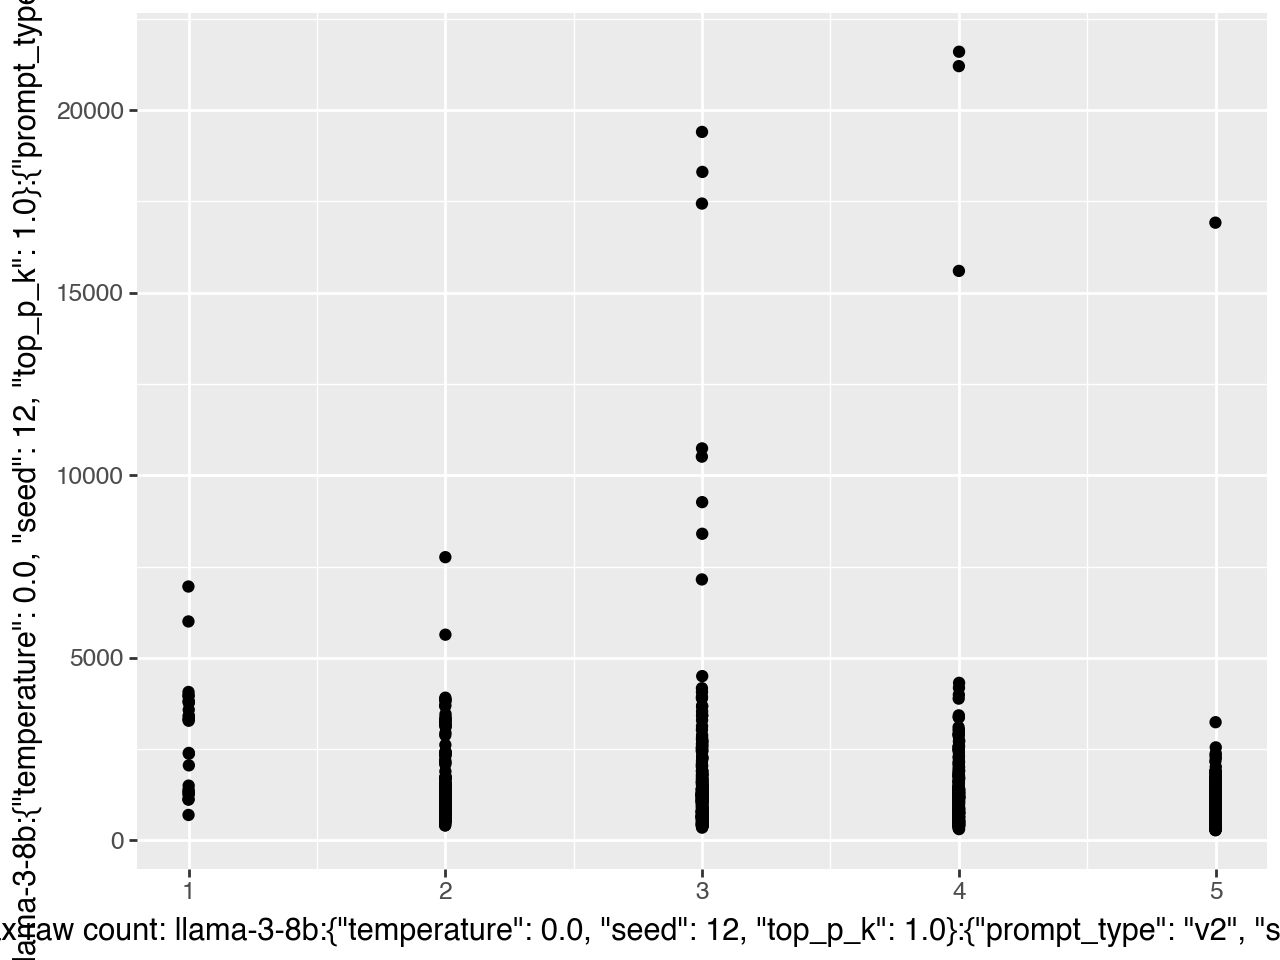

max raw count: llama-3-70b:{"temperature": 0.0, "seed": 12, "top_p_k": 1.0}:{"prompt_type": "v2", "shots": "few"}


<IPython.core.display.Javascript object>

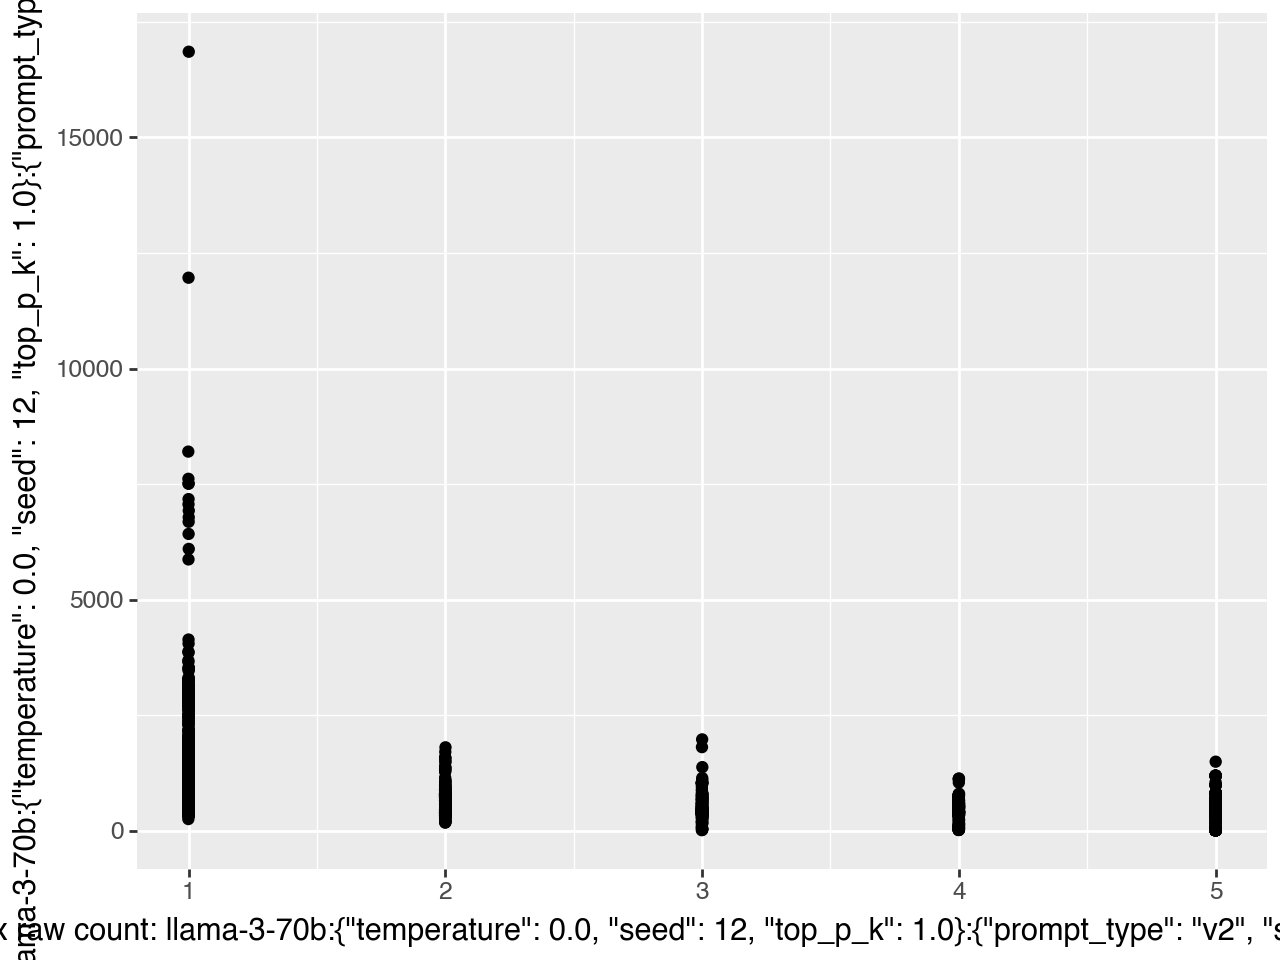

In [121]:
import re
config_df = pd.read_csv('difficulty_eval.csv')
#display(config_df)
for col in config_df.columns:
    m = re.match('max raw count: (.*)', col)
    if m:
        print(col)
        y_dim = f'raw length avg: {m.group(1)}'
        plot = ( p9.ggplot(data=config_df)
        + p9.geom_jitter(mapping=p9.aes(x=col, y=y_dim), width=.001))
        display(plot)
    

Simulate data

Getting no results, time to simulate some data to see if I can recover signal.


0
